In [128]:
import pandas as pd
import seaborn as sns

In [129]:
fd = pd.read_csv('C:\\Users\\mohamedsobhy\\Desktop\\lec09\\multiple linear regression\\50_Startups.csv')

In [130]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [131]:
fd.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [132]:
fd.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237FFACB448>,
      dtype=object)

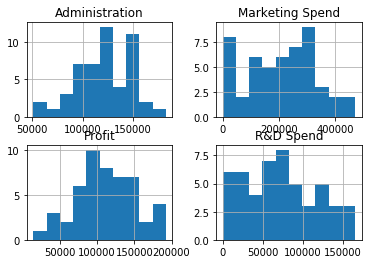

In [133]:
fd.hist()

In [134]:
fd.loc[fd['R&D Spend']==0 , 'R&D Spend']

47    0.0
49    0.0
Name: R&D Spend, dtype: float64

In [135]:
fd['R&D Spend'].median()

73051.08

In [136]:
fd.loc[fd['R&D Spend']==0 , 'R&D Spend'] =fd['R&D Spend'].median()
fd.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000
mean,76643.65880,121344.639600,211025.097800,112012.639200
std,43318.48584,28017.802755,122290.310726,40306.180338
min,542.05000,51283.140000,0.000000,14681.400000
25%,46117.03250,103730.875000,129300.132500,90138.902500
50%,73522.82000,122699.795000,212716.240000,107978.190000
75%,101602.80000,144842.180000,299469.085000,139765.977500
max,165349.20000,182645.560000,471784.100000,192261.830000


In [137]:
fd.loc[fd['Marketing Spend']==0 , 'Marketing Spend']

19    0.0
47    0.0
48    0.0
Name: Marketing Spend, dtype: float64

In [138]:
fd.loc[fd['Marketing Spend']==0 , 'Marketing Spend'] =fd['Marketing Spend'].median()
fd.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000
mean,76643.65880,121344.639600,223788.072200,112012.639200
std,43318.48584,28017.802755,109829.200717,40306.180338
min,542.05000,51283.140000,1903.930000,14681.400000
25%,46117.03250,103730.875000,142431.385000,90138.902500
50%,73522.82000,122699.795000,213675.525000,107978.190000
75%,101602.80000,144842.180000,299469.085000,139765.977500
max,165349.20000,182645.560000,471784.100000,192261.830000


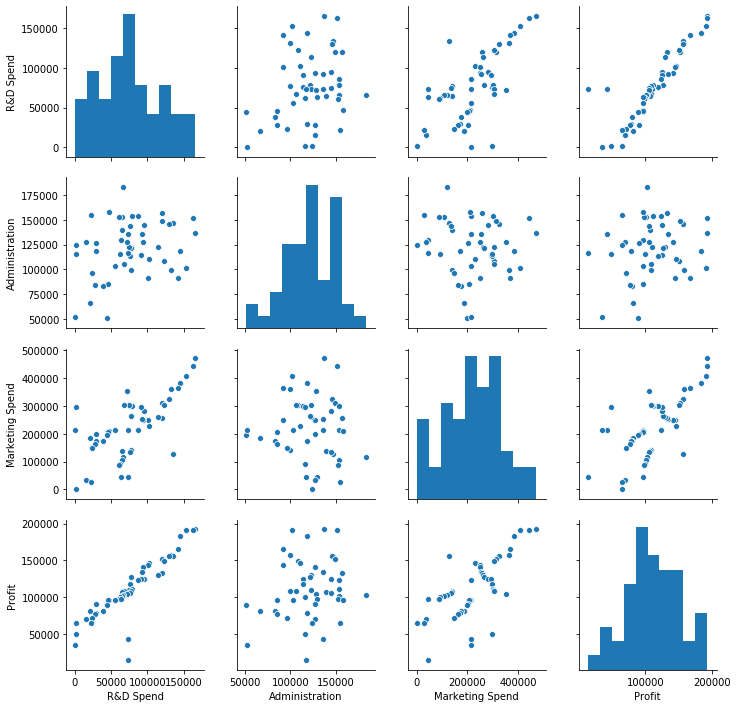

In [139]:
sns.pairplot(fd)

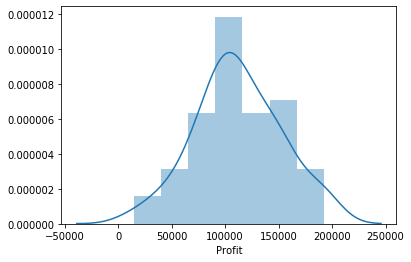

In [140]:
sns.distplot(fd['Profit'])

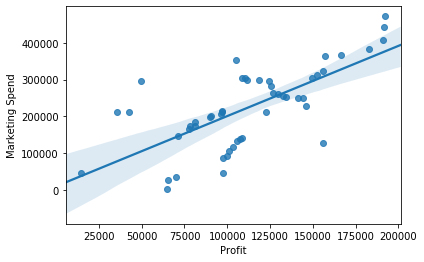

In [141]:
sns.regplot(x=fd['Profit'], y=fd['Marketing Spend'])

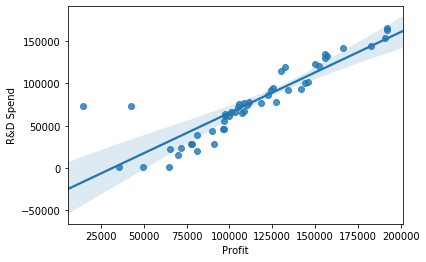

In [142]:
sns.regplot(x=fd['Profit'], y=fd['R&D Spend'])

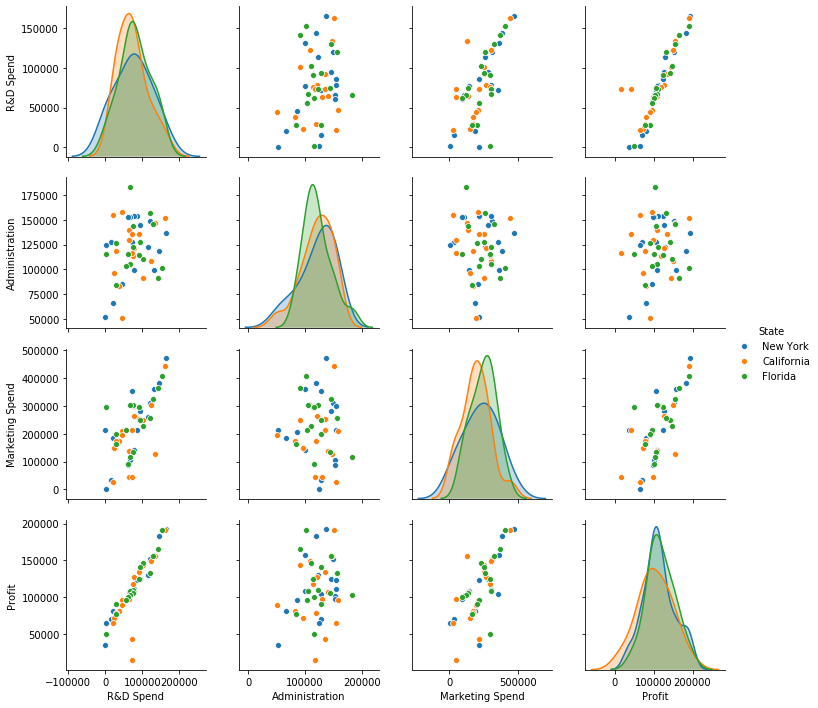

In [143]:
sns.pairplot(fd,hue='State')

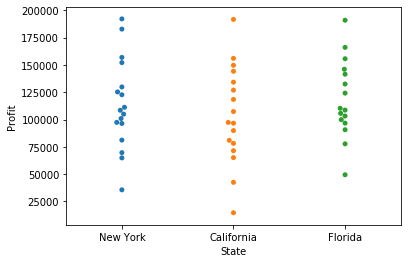

In [144]:
sns.swarmplot(y=fd['Profit'],x=fd['State'],data=fd)

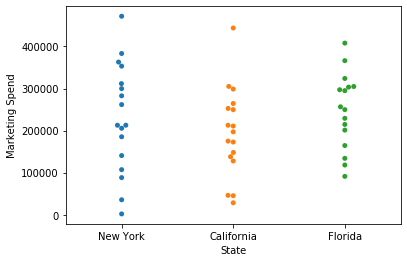

In [145]:
sns.swarmplot(y=fd['Marketing Spend'],x=fd['State'],data=fd)

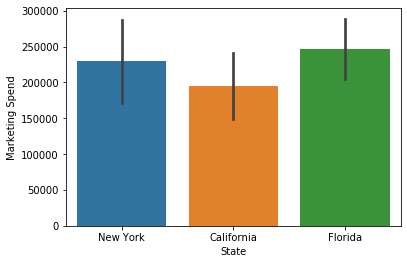

In [146]:
sns.barplot(y=fd['Marketing Spend'],x=fd['State'],data=fd)

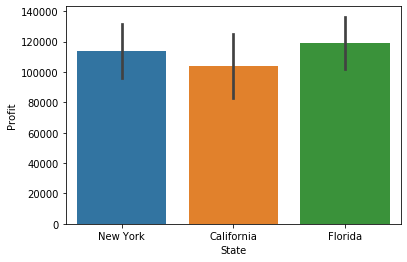

In [147]:
sns.barplot(y=fd['Profit'],x=fd['State'],data=fd)

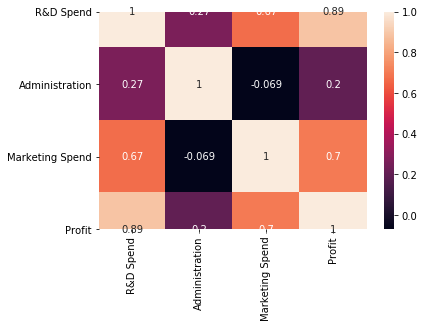

In [148]:
sns.heatmap(fd.corr(),annot=True)

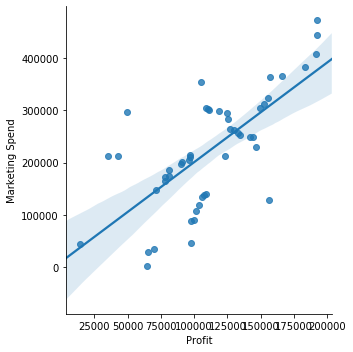

In [149]:
sns.lmplot(x='Profit',y='Marketing Spend',data=fd)

In [150]:
q1 = fd.quantile(0.25)

In [151]:
q1

R&D Spend           46117.0325
Administration     103730.8750
Marketing Spend    142431.3850
Profit              90138.9025
Name: 0.25, dtype: float64

In [152]:
q3 = fd.quantile(0.75)
q3

R&D Spend          101602.8000
Administration     144842.1800
Marketing Spend    299469.0850
Profit             139765.9775
Name: 0.75, dtype: float64

In [153]:
IQR = q3 -q1
IQR

R&D Spend           55485.7675
Administration      41111.3050
Marketing Spend    157037.7000
Profit              49627.0750
dtype: float64

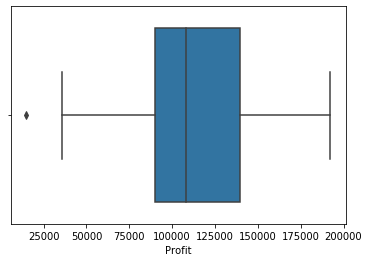

In [154]:
sns.boxplot(x=fd['Profit'])

In [155]:
for col in fd.columns:
    print(col)
    if col.isdigit():
        fd.loc[(fd[col]<(q1[col]-1.5*IQR[col]))|(fd[col]>(q3[col]+1.5*IQR[col])),col]=fd[col].median()

R&D Spend
Administration
Marketing Spend
State
Profit


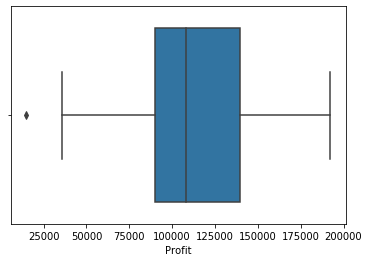

In [156]:
sns.boxplot(x=fd['Profit'])

In [157]:
fd.loc[(fd['Profit']<(q1['Profit']-1.5*IQR['Profit']))|(fd['Profit']>(q3['Profit']+1.5*IQR['Profit'])),'Profit']=fd['Profit'].median()

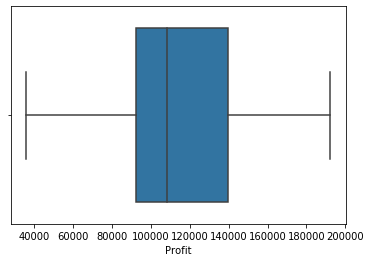

In [158]:
sns.boxplot(x=fd['Profit'])

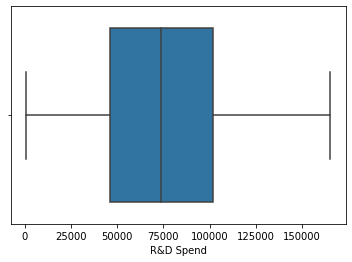

In [159]:
sns.boxplot(x=fd['R&D Spend'])

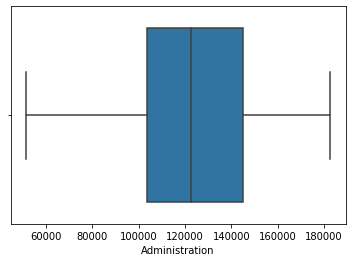

In [160]:
sns.boxplot(x=fd['Administration'])

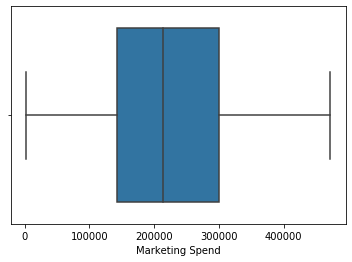

In [161]:
sns.boxplot(x=fd['Marketing Spend'])

In [162]:
fd1 = fd.copy()
fd1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
sc = MinMaxScaler()
fd1[['R&D Spend','Administration','Marketing Spend','Profit']] = sc.fit_transform(fd1[['R&D Spend','Administration','Marketing Spend','Profit']])

In [165]:
fd1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.651744,1.000000,New York,1.000000
1,0.983305,0.761972,0.940654,California,0.997000
2,0.927748,0.379579,0.864115,Florida,0.992264
3,0.872719,0.512998,0.811474,New York,0.940226
4,0.858975,0.305328,0.775228,Florida,0.833488
5,0.796900,0.369448,0.768190,New York,0.774755
6,0.813517,0.730161,0.267755,California,0.769208
7,0.787321,0.717457,0.685223,Florida,0.766846
8,0.728127,0.741733,0.659124,New York,0.744234
9,0.745070,0.436929,0.645011,California,0.728576


In [228]:
fd2 = fd.copy()

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
x= fd2.drop(["State","Profit"],axis=1)
y=fd2['Profit']

In [231]:
x_train ,  x_test ,y_train , y_test = train_test_split(x,y,test_size=0.3)

In [232]:
x_train

,R&D Spend,Administration,Marketing Spend
3,144372.41,118671.85,383199.62
44,22177.74,154806.14,28334.72
37,44069.95,51283.14,197029.42
15,114523.61,122616.84,261776.23
49,73051.08,116983.80,45173.06
48,542.05,51743.15,212716.24
14,119943.24,156547.42,256512.92
22,73994.56,122782.75,303319.26
19,86419.70,153514.11,212716.24
46,1315.46,115816.21,297114.46


In [233]:
y_train

3     182901.99
44     65200.33
37     89949.14
15    129917.04
49    107978.19
48     35673.41
14    132602.65
22    110352.25
19    122776.86
46     49490.75
33     96778.92
0     192261.83
38     81229.06
43     69758.98
42     71498.49
5     156991.12
8     152211.77
16    126992.93
24    108552.04
21    111313.02
10    146121.95
31     97483.56
26    105733.54
32     97427.84
29    101004.64
34     96712.80
13    134307.35
7     155752.60
27    105008.31
45     64926.08
40     78239.91
39     81005.76
1     191792.06
41     77798.83
12    141585.52
Name: Profit, dtype: float64

In [234]:
df_train = pd.concat([x_train,y_train],axis=1) 

In [235]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(35, 3) (15, 3) (35,) (15,)


In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
y_hat = model.predict(x_test)
y_hat

array([103953.49890777, 179100.74887857, 111489.4351827 , 153588.03614755,
       127709.63395031, 129567.64046365, 104349.00364281, 115129.21223728,
       169633.49099249,  75354.23180222,  90066.59424707, 134871.26495973,
       101680.78328578, 108186.73097672, 160722.45441106])

In [239]:
y_test

25    107404.34
2     191050.39
47     42559.73
9     149759.96
18    124266.90
17    125370.37
28    103282.38
20    118474.03
4     166187.94
36     90708.19
35     96479.51
11    144259.40
30     99937.59
23    108733.99
6     156122.51
Name: Profit, dtype: float64

In [240]:
model.score(x_train,y_train)

0.9558895660576773

In [241]:
model.score(x_test,y_test)

0.7076182976026677

In [242]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [243]:
np.sqrt(mean_squared_error(y_test,y_hat))

18910.018094162147

In [244]:
model.predict([[200000,50000,200000]])

array([215858.55489579])

In [245]:
model.coef_

array([ 0.81425832, -0.01300629,  0.00874336])

In [246]:
model.intercept_

51908.5330069728